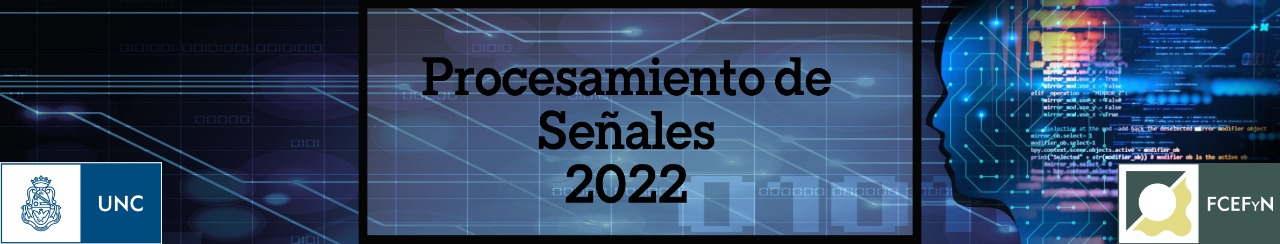

# **Laboratorio 4** ⏰


# Instalamos e importamos las librerías y funciones necesarias 👏

```



In [1]:
#Importamos librerías o funciones y renombramos algunas todas juntas
import numpy as np 
import math
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal

#En caso que salga un error al no estar instalada alguna librería en nuestro entorno la instalamos 
#!pip install xxxx

## Ejercicio 2 del práctico.
(a) Genere las ventanas Bartlett, Rectangular, Hamming y Blackman de longitud $128$ y grafique las $3$ en el mismo gráfico.



rectangular, Blackman y  con longitudes L = 33 y 99.
* Calcule su transformada de Fourier y represente su módulo en dB. Incluya varias
representaciones en el mismo gráfico. Qué comentarios puede hacer?
* Calcule el ancho de banda a 3 dB.
* Determine la altura máxima de los lóbulos laterales.
* Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

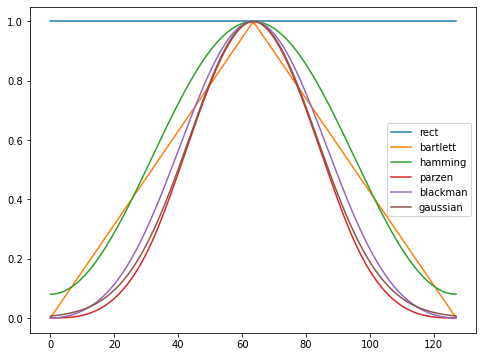

In [12]:
#from scipy import signal
# https://docs.scipy.org/doc/scipy/reference/signal.windows.html

w1 = np.ones(128) #rectangular
w2 = signal.bartlett(128)
w3=  signal.hamming(128)
w4 = signal.parzen(128) #no la pedimos ..
w5 = signal.blackman(128)
w6 = signal.gaussian(128, std = 20)

l = np.arange(128) #longitud del eje de las abscisas

plt.figure(figsize=(8, 6))
#p1, p2, p3, p4, 
p = plt.plot(l,w1,l,w2, l,w3, l,w4,l, w5, w6)
plt.legend(('rect','bartlett','hamming','parzen', 'blackman', 'gaussian'))

Text(0.5, 0, 'Sample')

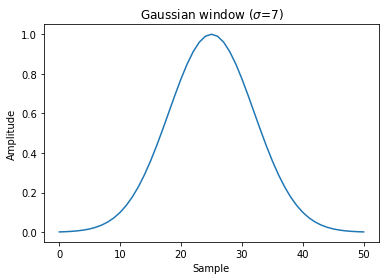

In [9]:
#Gráfica de ventana gaussiana
window = signal.gaussian(51, std=7)
plt.plot(window)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [13]:
print(w2[63])   #fórmula de la bartlett
print(w2[64])
print(w2[62])
print(w2[65])
ww=signal.bartlett(12)
print(ww)

0.9921259842519685
0.9921259842519685
0.9763779527559056
0.9763779527559056
[0.         0.18181818 0.36363636 0.54545455 0.72727273 0.90909091
 0.90909091 0.72727273 0.54545455 0.36363636 0.18181818 0.        ]


Text(0.5, 1.0, 'Gaussian')

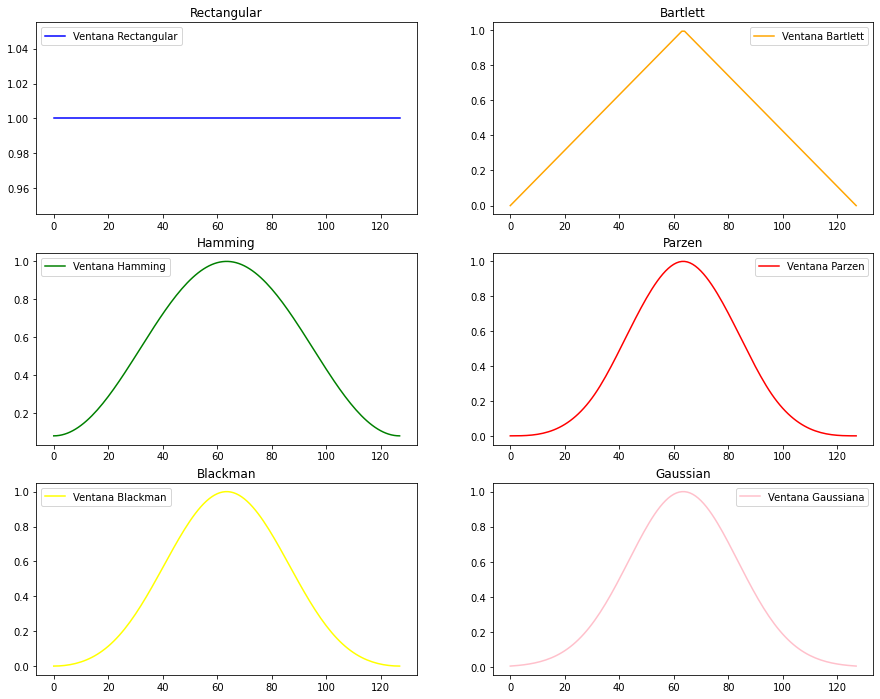

In [25]:
fig, axs = plt.subplots(3,2,figsize=(15,12))

axs[0,0].plot(w1, color='blue', label='Ventana Rectangular')
axs[0,0].legend(loc='upper left')
axs[0,0].set_title('Rectangular')

axs[0,1].plot(w2, color='orange', label='Ventana Bartlett')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Bartlett')

axs[1,0].plot(w3, color='green', label='Ventana Hamming')
axs[1,0].legend(loc='upper left')
axs[1,0].set_title('Hamming')

axs[1,1].plot(w4, color='red', label='Ventana Parzen')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Parzen')

axs[2,0].plot(w5, color='yellow', label='Ventana Blackman')
axs[2,0].legend(loc='upper left')
axs[2,0].set_title('Blackman')

axs[2,1].plot(w6, color='pink', label='Ventana Gaussiana')
axs[2,1].legend(loc='upper right')
axs[2,1].set_title('Gaussian')

(b) Calcule su transformada de Fourier y represente su módulo en dB. Incluya varias

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


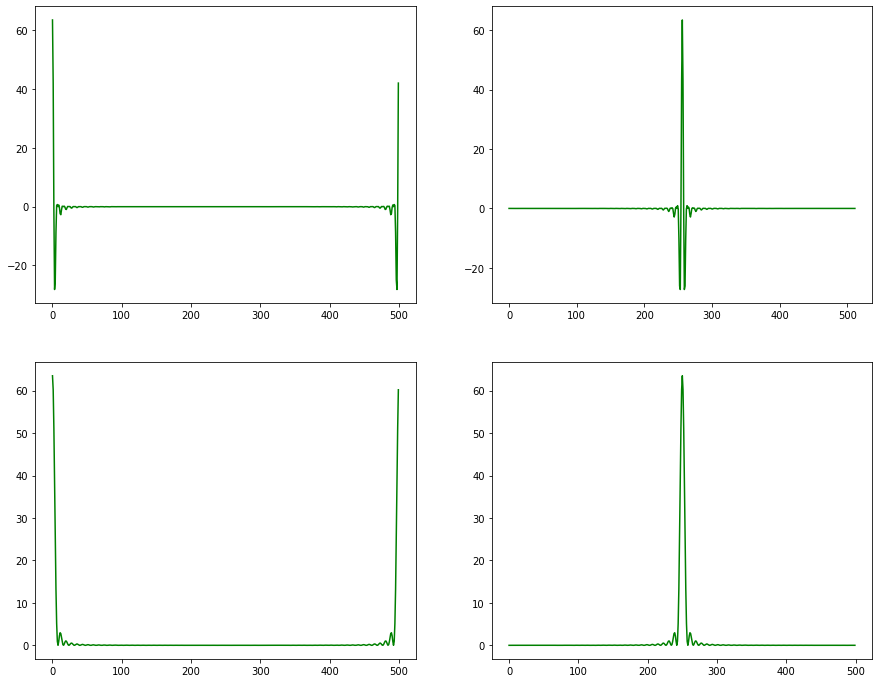

In [26]:
#Calculamos la transformada de Fourier de cada ventana, y las centramos
#Dónde ubico las frecuencias bajas

W1c=fftshift(fft(w1,512)) #fftshift solo centra
W2c=fftshift(fft(w2,512))
W3c=fftshift(fft(w3,512))
W4c=fftshift(fft(w4,512))
W5c=fftshift(fft(w5,512))
fig, axs = plt.subplots(2,2,figsize=(15,12))
axs[0,0].plot(fft(w2,500), color='g', label='Señal u+w') #plot(fft(w2,512))
axs[0,1].plot(W2c,color='g', label='Señal u+w')
axs[1,0].plot(abs(fft(w2,500)), color='g', label='Señal u+w') #plot(fft(w2,512))
axs[1,1].plot(abs(fftshift(fft(w2,500))), color='g', label='Señal u+w') #plot(fft(w2,512))

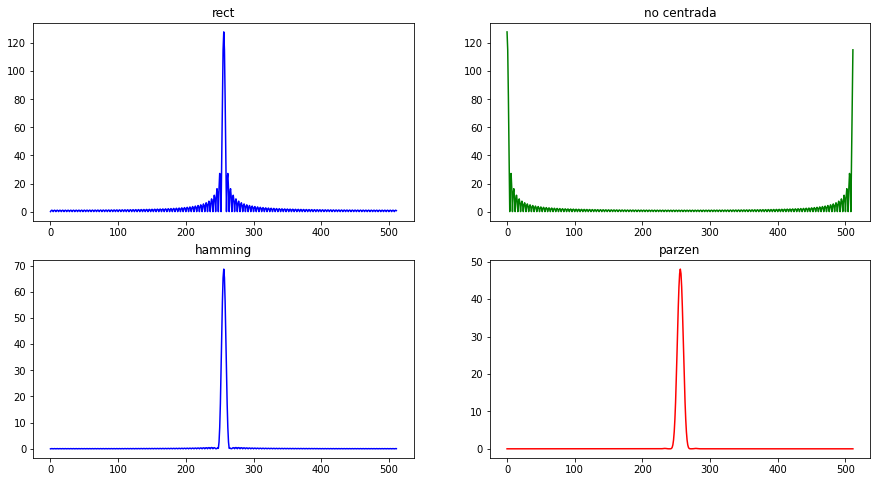

Ventanas en frecuencia


In [29]:
#Código nuevo

W1c=fftshift(fft(w1,512)) #fftshift solo centra  
W2c=fftshift(fft(w2,512))
W3c=fftshift(fft(w3,512))
W4c=fftshift(fft(w4,512))
W5c=fftshift(fft(w5,512))
#W6c = fftshift(fft(w5, 512)) para agregar la gaussiana
fig, axs = plt.subplots(2,2,figsize=(15,8))
axs[0,0].plot(abs(W1c), color='b')
axs[0,0].set_title('rect') 
axs[0,1].plot(abs(fft(w1,512)),color='g')
axs[0,1].set_title('no centrada')
#axs[1,0].plot(abs(fft(v)), color='b')
#axs[1,0].set_title('hamming') 
#axs[0,1].plot(abs(W2c),color='g')
#axs[0,1].set_title('bartlett')
axs[1,0].plot(abs(W3c), color='b')
axs[1,0].set_title('hamming') 
axs[1,1].plot(abs(W4c), color='r')
axs[1,1].set_title('parzen')
plt.show()

print('Ventanas en frecuencia')
#print(fft(w1,512)[511])
#print(fft(w1,512)[1])

In [28]:
#Representamos el módulo en dB de cada ventana.

W1dB=20*np.log10(1+abs(W1c))
W2dB=20*np.log10(1+abs(W2c))
W3dB=20*np.log10(1+abs(W3c))
W4dB=20*np.log10(1+abs(W4c))
W5dB=20*np.log10(1+abs(W5c))

In [30]:
print(W1dB)

[ 0.          4.64528148  6.02092695  4.64582337  0.          4.64690745
  6.02354426  4.64853434  0.          4.65070496  6.0287844   4.65342055
  0.          4.65668264  6.03665845  4.66049308  0.          4.66485406
  6.04718311  4.66976806  0.          4.6752379   6.06038076  4.6812667
  0.          4.68785795  6.07627963  4.69501545  0.          4.70274335
  6.09491392  4.71104614  0.          4.71992868  6.11632399  4.72939617
  0.          4.73945419  6.1405566   4.75010871  0.          4.76136607
  6.16766516  4.773233    0.          4.78571666  6.19771006  4.7988246
  0.          4.81256483  6.23075897  4.82694578  0.          4.84197633
  6.2668873   4.85766586  0.          4.8740242   6.30617862  4.8910617
  0.          4.90878923  6.34872521  4.92721819  0.          4.94636053
  6.39462858  4.96622879  0.          4.9868361   6.44400018  5.00819622
  0.          5.03032354  6.49696215  5.05323315  0.          5.07694081
  6.55364811  5.10146303  0.          5.12681708  6.61

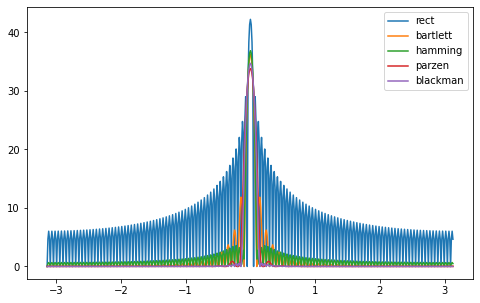

In [31]:
#Intervalo (en abcisa) sobre el cuál van a estar graficadas nuestras ventanas.
L=np.arange(-np.pi, np.pi- np.pi/256, np.pi/256) #intervalo [-pi,pi), centrado de [0,2pi) discretizado

plt.figure(figsize=(8, 5))
p1, p2, p3, p4, p5 = plt.plot(L,W1dB, L,W2dB, L,W3dB, L,W4dB,L, W5dB)
plt.legend(('rect','bartlett','hamming','parzen', 'blackman'))

Text(0.5, 1.0, 'blackman')

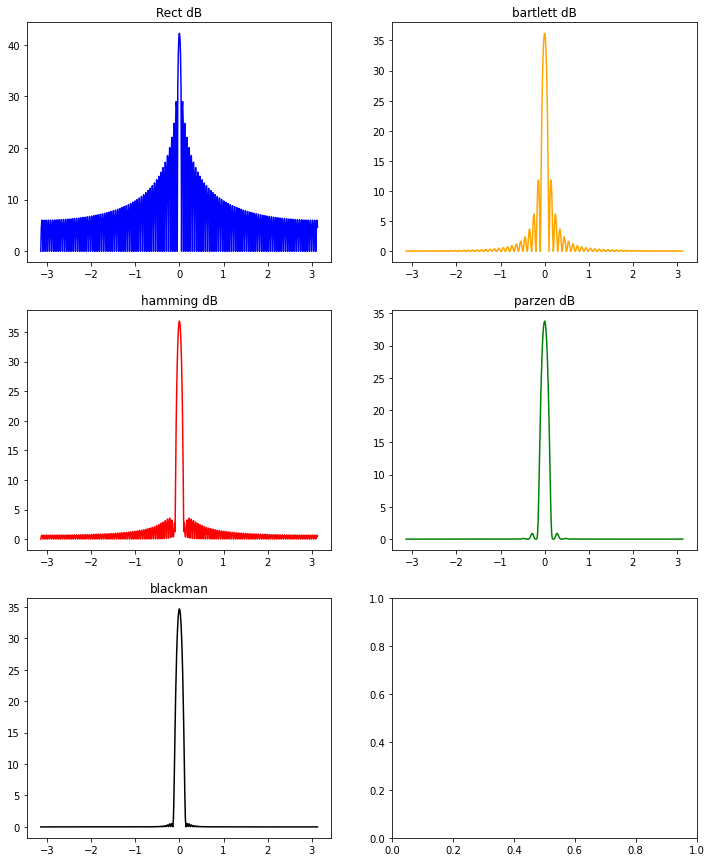

In [33]:
#Ejercicio: grafique las transformadas en ventanas separadas

fig, axs = plt.subplots(3,2,figsize=(12,15))
axs[0,0].plot(L, W1dB, color='blue')
axs[0,0].set_title('Rect dB')
axs[0,1].plot(L, W2dB, color='orange')
axs[0,1].set_title('bartlett dB')
axs[1,0].plot(L, W3dB, color='red')
axs[1,0].set_title('hamming dB')
axs[1,1].plot(L, W4dB, color='green')
axs[1,1].set_title('parzen dB')
axs[2,0].plot(L, W5dB, color='black')
axs[2,0].set_title('blackman')


(c) Determine la altura máxima de los lóbulos laterales.

27.16858051456904
[128.          27.16858051  27.16858051  16.3076972   16.3076972
  11.65537676  11.65537676   9.07258187   9.07258187   7.43048548
   7.43048548   6.29492438   6.29492438   5.46329006   5.46329006
   4.82832      4.82832      4.32791564   4.32791564   3.9236357
   3.9236357    3.59041044   3.59041044   3.31119305   3.31119305
   3.0739882    3.0739882    2.87011018   2.87011018   2.69311526
   2.69311526   2.53812234   2.53812234   2.40136651   2.40136651
   2.27989735   2.27989735   2.17137013   2.17137013   2.07389808
   2.07389808   1.98594592   1.98594592   1.90625175   1.90625175
   1.83376889   1.83376889   1.76762201   1.76762201   1.7070735
   1.7070735    1.65149755   1.65149755   1.60035979   1.60035979
   1.55320132   1.55320132   1.50962588   1.50962588   1.46928965
   1.46928965   1.43189291   1.43189291   1.3971733    1.3971733
   1.36490025   1.36490025   1.3348704    1.3348704    1.30690379
   1.30690379   1.28084068   1.28084068   1.25653886   1.25653

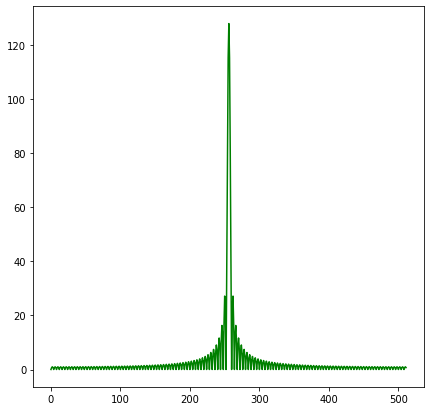

In [39]:
#Calculamos la altura máxima de los picos/lóbulos laterales de las ventanas.

picosw1=signal.find_peaks(abs(W1c))
lugares_picosw1 = picosw1[0]
altura_de_los_picos=abs(W1c[lugares_picosw1])
#print(altura_de_los_picos)
fig, axs = plt.subplots(figsize=(7,7))
axs.plot(abs(W1c),color='g', label='abs W1c') #para hacer un solo subplot

#sort lo que hace es ordenar de manera ascendentes las coordenadas de un vector. Entonces lo ordenamos con negativos
#luego nos quedamos con los positivos nuevamente para obtener el orden de manera descendente

altura_de_los_picos=abs(W1c[lugares_picosw1])

picordw1= -np.sort(-abs(W1c[lugares_picosw1])) #alturas ordenadas
#print(picordw1)

#como queremos la altura máxima de los picos laterales
print(picordw1[1])
print(picordw1)

#lo mismo para la ventana w2.
picosw2 = signal.find_peaks(abs(W2c))
picosw2 = picosw2[0]

picordw2= -np.sort(-abs(W2c[picosw2]))
print(picordw2)
print(picordw2[1])

(d) Calcule el ancho de banda en frecuencia de las ventanas utilizando la caída a 3 dB.

Text(0.5, 0, 'frecuencias en [-\\pi, \\pi)')

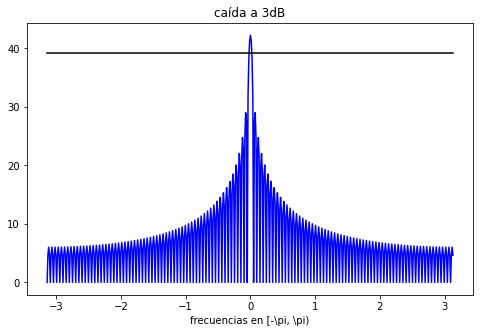

In [40]:
#Calculamos el ancho de banda en frecuencia usando una caida de 3dB

m3dB = (np.max(W1dB)-3)*np.ones(512)

plt.figure(figsize=(8, 5))
plt.plot(L,W1dB,'b',L,m3dB,'black')
plt.title('caída a 3dB')
plt.xlabel('frecuencias en [-\pi, \pi)')

In [41]:
#Normalizando las transformadas (sin pasar a decibeles)
#Ventana rectangular

W1N=abs(W1c/np.max(W1c)) #transformada(centrada), ahora normalizada, 

#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707

print(sum(W1N>0.707)/512*2*np.pi)
print(sum(W1N>0.707))

#W2N=abs(W2c./max(W2c));
#length(find(W2N>0.707))

#calcularlo para las otras ventanas y compararlas

0.03681553890925539
3


##**Transformada de Fourier a tiempo corto de una señal** ⛹

**$STFT(x,h,t,w)=DFT(x.h_t)(w)$**


**p/c t**(tiempo): es la Trasnf de Fourier de x por la ventana centrada en t 

**Señal compleja que depende de la frecuencia w**

El Espectrograma de una señal es el módulo al cuadrado de la STFT (ver pág 121 apunte), también función de t y w:

**$Espectrograma_x(t,w)=|STFT(x,t,w)|^2=|DFT(x.h_t)(w)|^2$**

## Ejercicio 4

Genere variables con las siguientes **señales NO estacionarias** y luego analícelas con la STFT mirando su Espectrograma utilizando distintas resoluciones para tiempo-frecuencia.

Señales:

- de audio: 'audio2.wav'

- Chirp Lineal y Cuadrático;

- de Electrocardiogramas: en los archivos ’O1.txt’ y ’Y1.txt’.

**Señal de audio:**

In [ ]:
#recordar subir el archivo de audio

In [44]:
au2 = read('audio2(1).wav')
print (au2) #terna
A2 = au2[1] #vector de datos, arreglo numpy
print (A2)

(48000, array([    0,     0,     0, ..., -1005, -1548, -1417], dtype=int16))
[    0     0     0 ... -1005 -1548 -1417]


Que significa aux2?

CM= cantidad de muestras

Fr=frecuencia de muestreo (en Hertz)

TA=tiempo del audio (en segundos)=N/Fr


In [45]:
CM= len(A2) #cantidad de muestras de la señal (vector de datos)
Fr=au2[0] #frecuencia de muestereo en Hertz (Fr muestras por segundo)
TA=CM/Fr
P=1/Fr #período de muestreo, long del intervalo entre muestra y muestra en segundos
print('la señal de audio dura', TA, 'segundos')
print('la señal se grabó tomando muestras cada', P, 'segundos')


la señal de audio dura 1.94 segundos
la señal se grabó tomando muestras cada 2.0833333333333333e-05 segundos


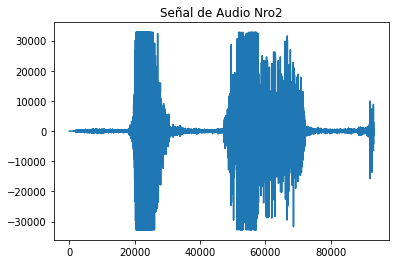

In [46]:
plt.plot(A2)
plt.title('Señal de Audio Nro2')
plt.show() 


[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 1.93993750e+00
 1.93995833e+00 1.93997917e+00]


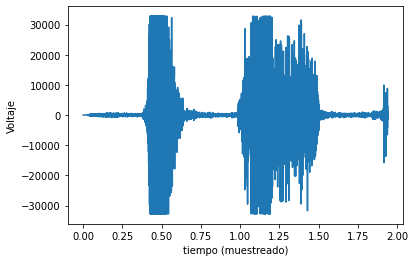

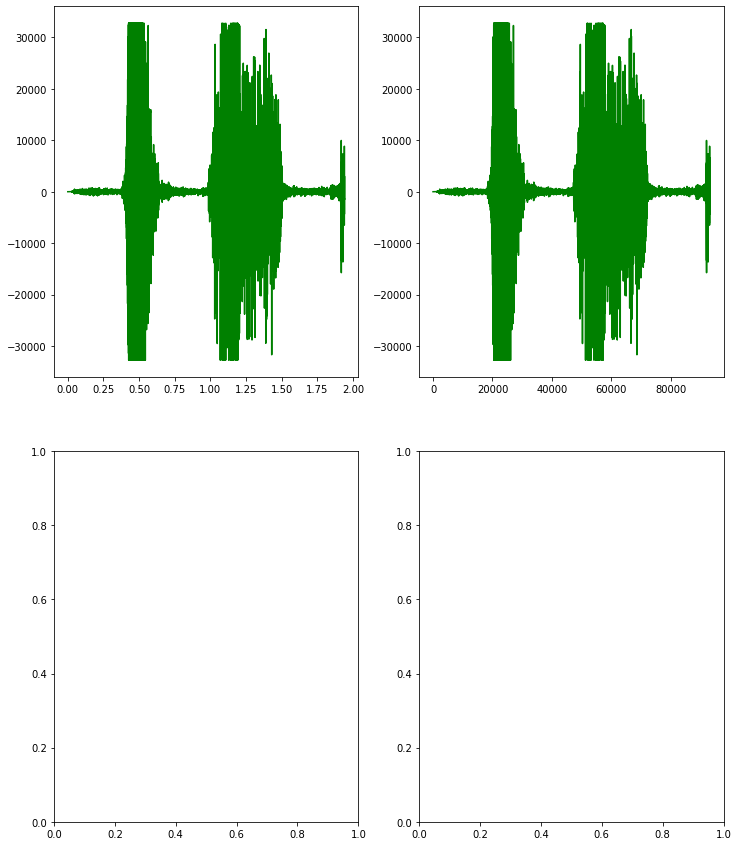

In [47]:
t=np.arange(CM)/Fr #vector de tiempos discreto:
print(t)
plt.plot(t,A2)
plt.xlabel('tiempo (muestreado)')
plt.ylabel('Voltaje')
plt.show()
fig, axs = plt.subplots(2,2,figsize=(12,15))
axs[0,0].plot(t, A2,color='g', label='Audio con tiempo')
axs[0,1].plot(A2,color='g', label='Audio en crudo')



**Señal Chirp Lineal**

Señal oscilante con frec de oscilación creciente de manera lineal

tiempo en el intervalo [0,2] muestreado con 2001 muestras:
[0.000e+00 1.000e-03 2.000e-03 ... 1.998e+00 1.999e+00 2.000e+00]


Text(0.5, 1.0, 'Chirp Lineal')

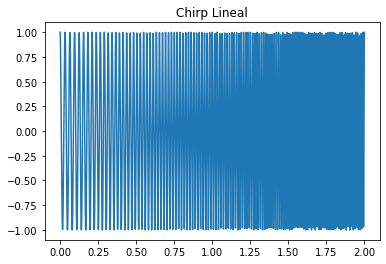

In [48]:
t = np.arange(0, 2.001, 0.001) #tiempo con 1000 Hz frec  de muestreo (Período o paso 0.001s)
print('tiempo en el intervalo [0,2] muestreado con', len(t),'muestras:')
print(t)
C1=signal.chirp(t,30,1,60) #frec inicial 30Hz y 60Hz al segundo
plt.plot(t,C1)
plt.title('Chirp Lineal')

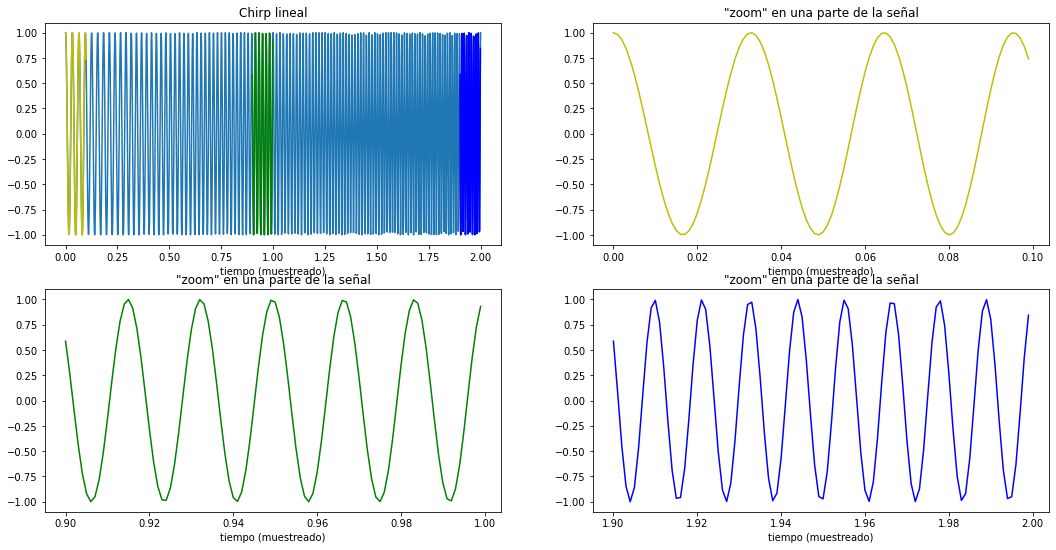

In [49]:
intervalo1=range(100)
intervalo2=range(900,1000)#cambiar a gusto
intervalo3=range(1900,2000)#cambiar a gusto
fig, axs = plt.subplots(2,2,figsize=(18,9))
axs[0,0].plot(t,C1)
axs[0,0].set_xlabel('tiempo (muestreado)')
axs[0,0].set_title('Chirp lineal')
axs[0,0].plot(t[intervalo1],C1[intervalo1], color='y')
axs[0,1].plot(t[intervalo1],C1[intervalo1], color='y')
axs[0,1].set_xlabel('tiempo (muestreado)')
axs[0,1].set_title('"zoom" en una parte de la señal')
axs[0,0].plot(t[intervalo2],C1[intervalo2], color='g')
axs[1,0].plot(t[intervalo2],C1[intervalo2], color='g')
axs[1,0].set_xlabel('tiempo (muestreado)')
axs[1,0].set_title('"zoom" en una parte de la señal')
axs[0,0].plot(t[intervalo3],C1[intervalo3], color='b')
axs[1,1].plot(t[intervalo3],C1[intervalo3], color='b')
axs[1,1].set_xlabel('tiempo (muestreado)')
axs[1,1].set_title('"zoom" en una parte de la señal')
plt.show()

**Señal Chirp Cuadrático**

Señal oscilante con frec de oscilación creciente de  manera cuadrática 

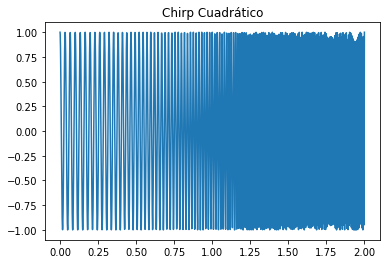

In [50]:
C2=signal.chirp(t,30,1,60,'q') #frec inicial 30Hz y 60Hz al segundo
plt.plot(t,C2)
plt.title('Chirp Cuadrático')
plt.show()

Analizamos Chirp Cuadrático:

Elegimos la ventana Hamming con dos  resoluciones definidas por el ancho de ventana: 33 y 501

In [51]:
M=len(C2)#Long de la señal
print(M)
frecn_q=np.linspace(-0.5,0.5,M, endpoint=False) #discretizamos las frecuencias en [-.5,.5) con M muestras, puede ser entre [-pi,pi) 
TF_C_C2=fftshift(abs(fft(C2))) #Transf. de fourier punto M, valor absoluto y centrada (con fftshift)

h33=signal.hamming(33)
h501=signal.hamming(501)
f1, t1, Sxx1 = signal.spectrogram(C2,window=h33, noverlap=None) #espectograma sin solape
f2, t2, Sxx2 = signal.spectrogram(C2,window=h501, noverlap=None) # espectrograma sin solape

2001


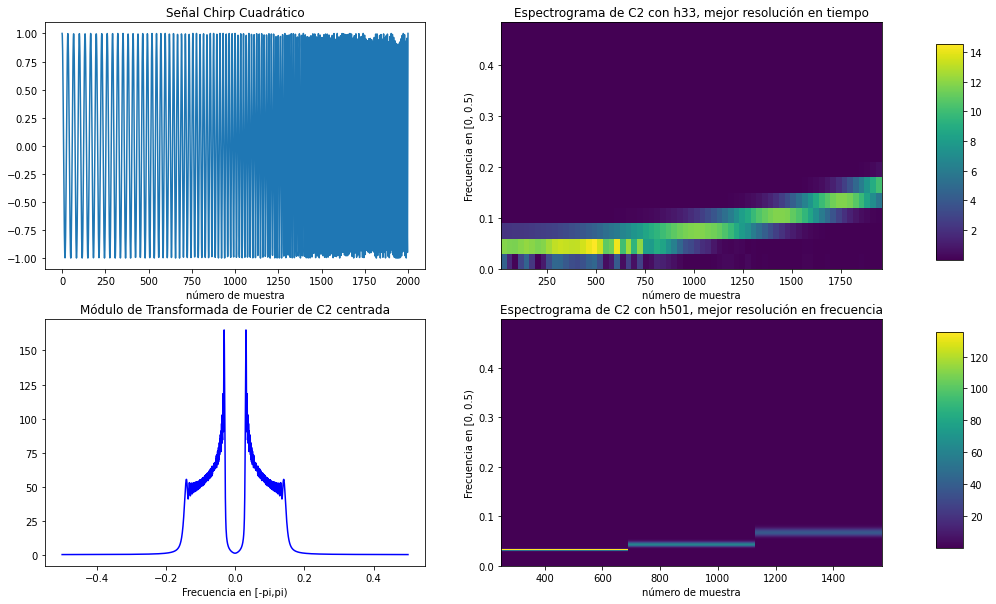

In [52]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(C2)
axs[0,0].set_title('Señal Chirp Cuadrático')
axs[0,0].set_xlabel('número de muestra')


axs[1,0].plot(frecn_q,TF_C_C2, color='blue')
axs[1,0].set_title('Módulo de Transformada de Fourier de C2 centrada')
axs[1,0].set_xlabel('Frecuencia en [-pi,pi)')

im1=axs[0,1].pcolormesh(t1, f1, Sxx1)
axs[0,1].set_title('Espectrograma de C2 con h33, mejor resolución en tiempo')
axs[0,1].set_ylabel('Frecuencia en [0, 0.5)')
axs[0,1].set_xlabel('número de muestra')

im2=axs[1,1].pcolormesh(t2, f2, Sxx2)
axs[1,1].set_title('Espectrograma de C2 con h501, mejor resolución en frecuencia')
axs[1,1].set_ylabel('Frecuencia en [0, 0.5)')
axs[1,1].set_xlabel('número de muestra')


fig.subplots_adjust(right=0.9)

cbar_ax = fig.add_axes([0.95, 0.55, 0.025, 0.3])
fig.colorbar(im1, cax=cbar_ax)

cbar_ax2 = fig.add_axes([0.95, 0.15, 0.025, 0.3])
fig.colorbar(im2, cax=cbar_ax2)


plt.show()

Repetir el análisis anterior para la señal concatenada utilizando la ventanas hamming y rectangular de longitud 201, comentar las diferencia que visualiza en la comparación del uso de las dos ventanas.

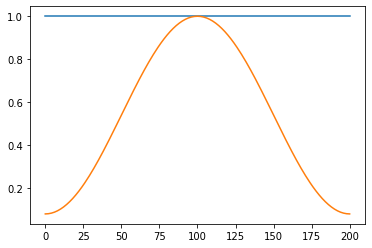

In [53]:
hr201=signal.boxcar(201)
hh201=signal.hamming(201)
plt.plot(hr201)
plt.plot(hh201)
plt.show()

In [54]:
f1, t1, Sxx1 = signal.spectrogram(C2,window=hr201, noverlap=None) #espectograma
f2, t2, Sxx2 = signal.spectrogram(C2,window=hh201, noverlap=None)
print(f1.shape,t1.shape,Sxx1.shape)
print(f2.shape,t2.shape,Sxx2.shape)
print(t2)

(101,) (11,) (101, 11)
(101,) (11,) (101, 11)
[ 100.5  276.5  452.5  628.5  804.5  980.5 1156.5 1332.5 1508.5 1684.5
 1860.5]


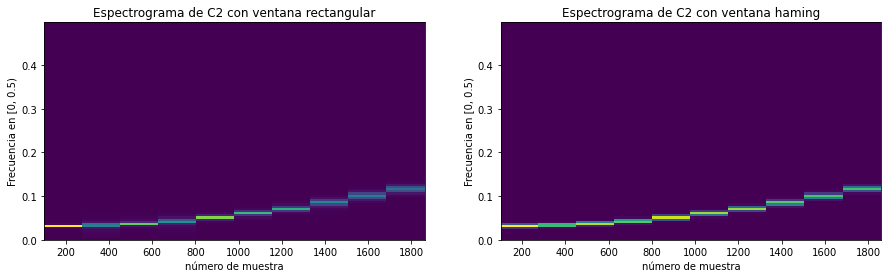

In [55]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
axs[0].pcolormesh(t1, f1, Sxx1)
axs[0].set_title('Espectrograma de C2 con ventana rectangular')
axs[0].set_ylabel('Frecuencia en [0, 0.5)')
axs[0].set_xlabel('número de muestra')

axs[1].pcolormesh(t2, f2, Sxx2)
axs[1].set_title('Espectrograma de C2 con ventana haming')
axs[1].set_ylabel('Frecuencia en [0, 0.5)')
axs[1].set_xlabel('número de muestra')

plt.show()